# AWS IAM Security Assessment Report Analysis

This notebook displays and analyzes the findings from the IAM security assessment using pandas and data visualization libraries.

## Overview
We'll load the `demo_simple_report.json` file and create interactive visualizations to understand:
- Security issues by type
- Most affected users
- Timeline of findings
- Summary statistics

In [9]:
# Import Required Libraries
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import numpy as np

# Set up plotting style
plt.style.use('default')
sns.set_palette("husl")
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

print("Libraries imported successfully!")

Libraries imported successfully!


In [11]:
# Load Report Data
# Load the demo_simple_report.json file
try:
    with open('simple/demo_simple_report.json', 'r') as f:
        report_data = json.load(f)
    
    print("✅ Successfully loaded demo_simple_report.json")
    print(f"📊 Assessment Time: {report_data['assessment_time']}")
    print(f"📋 Total Findings: {report_data['total_findings']}")
    
    # Display basic report structure
    print("\n📄 Report Structure:")
    for key in report_data.keys():
        print(f"  • {key}: {type(report_data[key]).__name__}")
        
except FileNotFoundError:
    print("❌ Error: demo_simple_report.json not found in simple/ directory")
except json.JSONDecodeError:
    print("❌ Error: Invalid JSON format in demo_simple_report.json")

✅ Successfully loaded demo_simple_report.json
📊 Assessment Time: 2025-09-04T11:28:01.541441
📋 Total Findings: 30

📄 Report Structure:
  • assessment_time: str
  • total_findings: int
  • findings: list


In [12]:
# Create DataFrame from Findings
# Convert findings to a pandas DataFrame
if 'report_data' in locals() and report_data['total_findings'] > 0:
    df_findings = pd.DataFrame(report_data['findings'])
    
    # Convert time_found to datetime
    df_findings['time_found'] = pd.to_datetime(df_findings['time_found'])
    
    print("📊 DataFrame created successfully!")
    print(f"Shape: {df_findings.shape}")
    print("\n🔍 First few rows:")
    display(df_findings.head())
    
    print("\n📈 DataFrame Info:")
    print(df_findings.info())
    
else:
    print("⚠️ No findings data available to create DataFrame")

📊 DataFrame created successfully!
Shape: (30, 3)

🔍 First few rows:


,time_found,identity_name,issue_name
0,2025-09-04 11:27:48.579969,Andrew_B,Excessive permissions - IAMFullAccess attached
1,2025-09-04 11:27:48.579969,Aram-playground,Excessive permissions - AdministratorAccess at...
2,2025-09-04 11:27:48.579969,charles-admin,Excessive permissions - IAMFullAccess attached
3,2025-09-04 11:27:48.579969,charles-admin,Excessive permissions - PowerUserAccess attached
4,2025-09-04 11:27:48.579969,danz-bedrock-testing,Excessive permissions - AdministratorAccess at...



📈 DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   time_found     30 non-null     datetime64[ns]
 1   identity_name  30 non-null     object        
 2   issue_name     30 non-null     object        
dtypes: datetime64[ns](1), object(2)
memory usage: 848.0+ bytes
None


🔍 Issues by Type:
issue_name
Excessive permissions - IAMFullAccess attached          4
Excessive permissions - AdministratorAccess attached    4
Old access key (359 days old)                           3
Old access key (429 days old)                           2
Old access key (715 days old)                           1
Old access key (491 days old)                           1
Old access key (682 days old)                           1
Old access key (612 days old)                           1
Old access key (561 days old)                           1
Old access key (392 days old)                           1
Old access key (527 days old)                           1
Old access key (533 days old)                           1
Old access key (729 days old)                           1
Old access key (486 days old)                           1
Old access key (784 days old)                           1
Old access key (331 days old)                           1
Old access key (135 days old)              

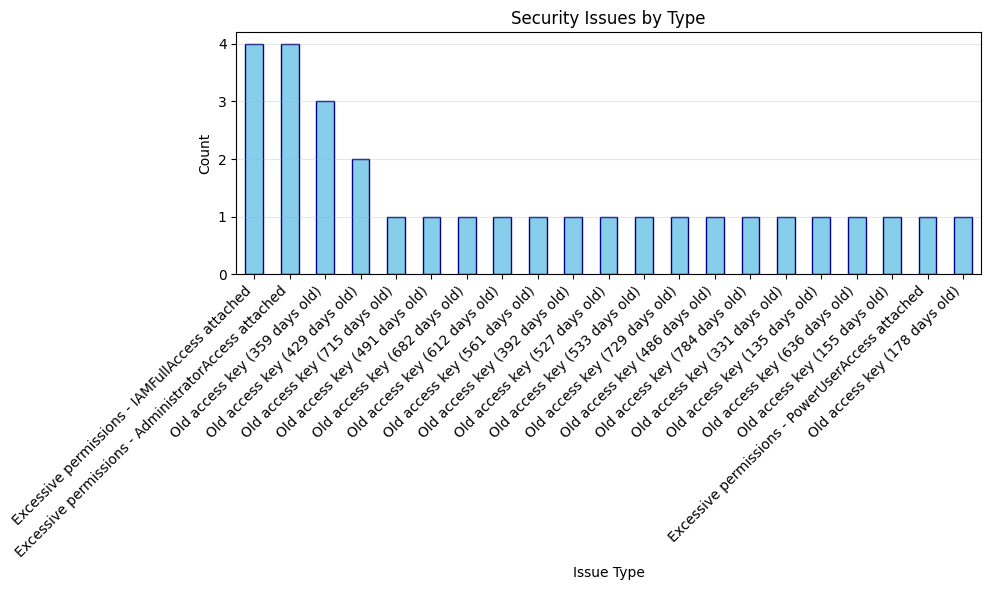

In [13]:
# Analyze Issue Types
if 'df_findings' in locals() and not df_findings.empty:
    # Count issues by type
    issue_counts = df_findings['issue_name'].value_counts()
    
    print("🔍 Issues by Type:")
    print(issue_counts)
    
    # Create visualization - Bar chart only
    plt.figure(figsize=(10, 6))
    
    issue_counts.plot(kind='bar', color='skyblue', edgecolor='navy')
    plt.title('Security Issues by Type')
    plt.xlabel('Issue Type')
    plt.ylabel('Count')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', alpha=0.3)
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ No data available for analysis")

👥 Most Affected Users:
identity_name
Aram-playground                       3
OktaSSOUser                           2
charles-admin                         2
gil-admin-test                        2
management-account-breakglass-user    2
Sharon_Onboarding                     2
Andrew_B                              1
TEST_USER_OFFBOARDED_TEST             1
terraform-test                        1
temp-employee                         1
Name: count, dtype: int64


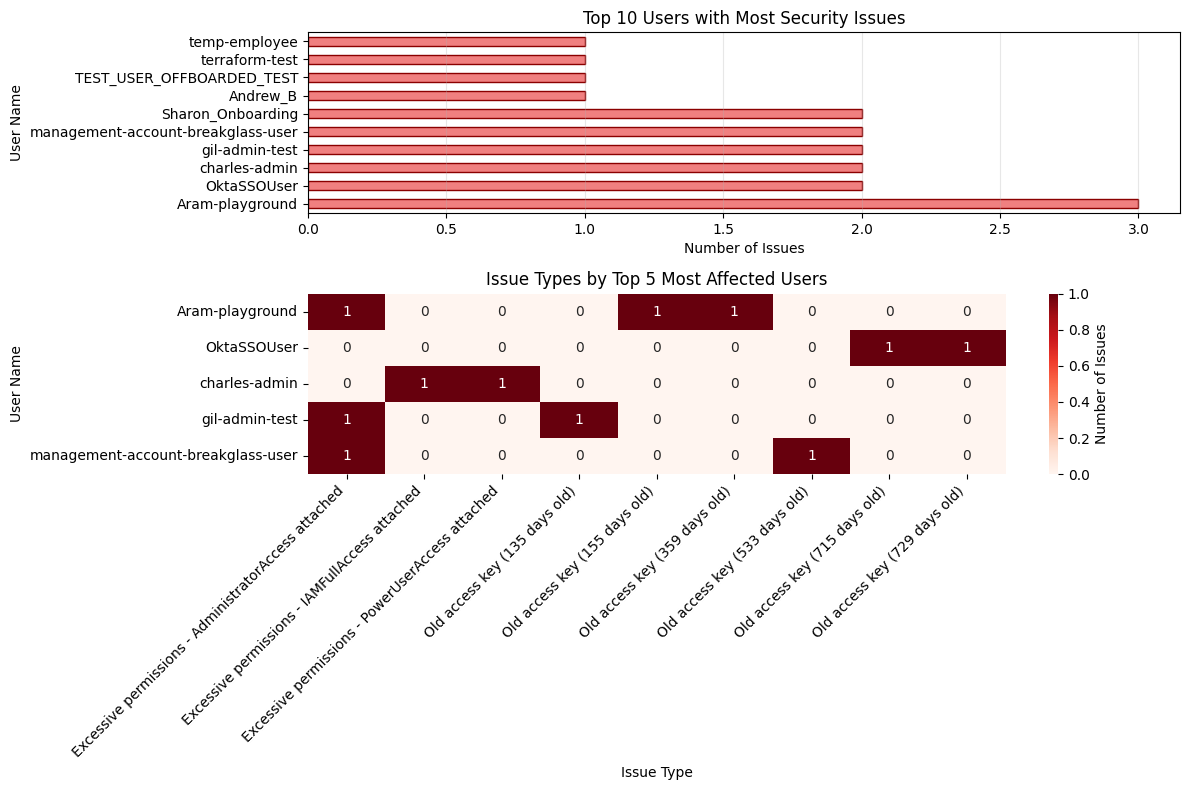

In [14]:
# Analyze Most Affected Users
if 'df_findings' in locals() and not df_findings.empty:
    # Count issues by user
    user_counts = df_findings['identity_name'].value_counts()
    
    print("👥 Most Affected Users:")
    print(user_counts.head(10))
    
    # Create visualization for top users
    plt.figure(figsize=(12, 8))
    
    # Top 10 users with most issues
    top_users = user_counts.head(10)
    
    plt.subplot(2, 1, 1)
    top_users.plot(kind='barh', color='lightcoral', edgecolor='darkred')
    plt.title('Top 10 Users with Most Security Issues')
    plt.xlabel('Number of Issues')
    plt.ylabel('User Name')
    plt.grid(axis='x', alpha=0.3)
    
    # Create a detailed breakdown for top 5 users
    plt.subplot(2, 1, 2)
    top_5_users = top_users.head(5).index
    
    # Create a pivot table for detailed view
    user_issue_matrix = df_findings[df_findings['identity_name'].isin(top_5_users)].pivot_table(
        index='identity_name', 
        columns='issue_name', 
        aggfunc='size', 
        fill_value=0
    )
    
    # Create heatmap
    sns.heatmap(user_issue_matrix, annot=True, cmap='Reds', fmt='d', cbar_kws={'label': 'Number of Issues'})
    plt.title('Issue Types by Top 5 Most Affected Users')
    plt.xlabel('Issue Type')
    plt.ylabel('User Name')
    plt.xticks(rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()
    
else:
    print("⚠️ No data available for user analysis")

In [15]:
# Summary Statistics and Export
if 'df_findings' in locals() and not df_findings.empty:
    print("📊 SUMMARY STATISTICS")
    print("=" * 50)
    
    # Basic statistics
    total_issues = len(df_findings)
    unique_users = df_findings['identity_name'].nunique()
    unique_issue_types = df_findings['issue_name'].nunique()
    
    print(f"📋 Total Security Issues: {total_issues}")
    print(f"👥 Affected Users: {unique_users}")
    print(f"🔍 Issue Types: {unique_issue_types}")
    
    # Most common issue
    most_common_issue = df_findings['issue_name'].mode()[0]
    most_common_count = df_findings['issue_name'].value_counts().iloc[0]
    print(f"⚠️ Most Common Issue: {most_common_issue} ({most_common_count} occurrences)")
    
    # User with most issues
    most_affected_user = df_findings['identity_name'].mode()[0]
    most_affected_count = df_findings['identity_name'].value_counts().iloc[0]
    print(f"🎯 Most Affected User: {most_affected_user} ({most_affected_count} issues)")
    
    print("\n📈 DETAILED BREAKDOWN")
    print("=" * 30)
    
    # Create summary tables
    issue_summary = df_findings.groupby('issue_name').agg({
        'identity_name': 'count',
        'time_found': 'first'
    }).rename(columns={'identity_name': 'count'}).sort_values('count', ascending=False)
    
    user_summary = df_findings.groupby('identity_name').agg({
        'issue_name': 'count',
        'time_found': 'first'
    }).rename(columns={'issue_name': 'issue_count'}).sort_values('issue_count', ascending=False)
    
    print("🔍 Issues Summary:")
    display(issue_summary)
    
    print("\n👥 Users Summary (Top 10):")
    display(user_summary.head(10))
    
    # Export processed data
    try:
        df_findings.to_csv('simple/processed_findings.csv', index=False)
        issue_summary.to_csv('simple/issue_summary.csv')
        user_summary.to_csv('simple/user_summary.csv')
        print("\n✅ Data exported successfully to CSV files in simple/ directory")
    except Exception as e:
        print(f"\n❌ Error exporting data: {str(e)}")
        
else:
    print("⚠️ No data available for summary statistics")

📊 SUMMARY STATISTICS
📋 Total Security Issues: 30
👥 Affected Users: 23
🔍 Issue Types: 21
⚠️ Most Common Issue: Excessive permissions - AdministratorAccess attached (4 occurrences)
🎯 Most Affected User: Aram-playground (3 issues)

📈 DETAILED BREAKDOWN
🔍 Issues Summary:


,count,time_found
issue_name,,
Excessive permissions - AdministratorAccess attached,4,2025-09-04 11:27:48.579969
Excessive permissions - IAMFullAccess attached,4,2025-09-04 11:27:48.579969
Old access key (359 days old),3,2025-09-04 11:27:55.292490
Old access key (429 days old),2,2025-09-04 11:27:55.292490
Old access key (527 days old),1,2025-09-04 11:27:55.292490
Old access key (729 days old),1,2025-09-04 11:27:55.292490
Old access key (715 days old),1,2025-09-04 11:27:55.292490
Old access key (682 days old),1,2025-09-04 11:27:55.292490
Old access key (636 days old),1,2025-09-04 11:27:55.292490



👥 Users Summary (Top 10):


,issue_count,time_found
identity_name,,
Aram-playground,3,2025-09-04 11:27:48.579969
OktaSSOUser,2,2025-09-04 11:27:55.292490
Sharon_Onboarding,2,2025-09-04 11:27:48.579969
charles-admin,2,2025-09-04 11:27:48.579969
management-account-breakglass-user,2,2025-09-04 11:27:48.579969
gil-admin-test,2,2025-09-04 11:27:48.579969
Andrew_B,1,2025-09-04 11:27:48.579969
keren-sandbox-user,1,2025-09-04 11:27:55.292490
terraform-test,1,2025-09-04 11:27:55.292490



✅ Data exported successfully to CSV files in simple/ directory


## 🎯 Key Findings & Recommendations

### Critical Security Issues Identified:

1. **Excessive Permissions** - Multiple users have high-privilege policies attached
   - **Action**: Review and implement least-privilege access principles
   - **Priority**: HIGH

2. **Old Access Keys** - Several access keys are significantly outdated
   - **Action**: Implement regular key rotation (90-day cycle)
   - **Priority**: MEDIUM

3. **MFA Status** - Monitor MFA compliance across all users
   - **Action**: Enforce MFA for all user accounts
   - **Priority**: HIGH

### Next Steps:

1. **Immediate Actions**:
   - Review users with excessive permissions
   - Rotate or delete old access keys
   - Enable MFA where missing

2. **Long-term Improvements**:
   - Implement automated compliance monitoring
   - Set up alerts for new security issues
   - Regular security assessments (monthly/quarterly)

3. **Exported Data**:
   - `processed_findings.csv` - Complete findings dataset
   - `issue_summary.csv` - Issues grouped by type
   - `user_summary.csv` - Users ranked by issue count

---
*Report generated from: `demo_simple_report.json`*